Problem statement:

The customers data with lot of features and their monthly installments are given(E1 to E12) for
one year. So monthly wise loan performance is given. ‘0’ means the customer paid the installment,
‘1’ means not paid the installment. Based on the following below features and E1 to E12, our target
is to predict the next month (E13) whether the customers will pay or not.
Make a machine learning classification model on target (0 or 1). The main metric you need to take
here is F1 Score. Come with a best model with high F1 score.
Follow the steps for making the good model.

Task-1

Data pre processing

Exploratory data analysis and visualizations

write what you understand from the data

Do feature engineering

Divide the dataset into train and test (do not include any synthetic points in the test data)
Select a best model from so many.

Apply on train data and test it on test data.

Try to select best features and best parameters for the model and improve your score.
Keep originality of your code. Do not copy paste from web or from others. 


Data contains the training data with details on loan as described
Variable Description

candidate_id :Unique customer loan ID

country :Loan origination channel

Organization: Name of the bank or financial institution

interest_rate: Loan interest rate

unpaid_principal_bal: Loan unpaid principal balance

loan_term: Loan term (in days)

origination_date: Loan origination date (YYYY-MM-DD)

first_payment_date: First instalment payment date

loan_to_value: Loan to value ratio

number_of_borrowers: Number of borrowers

debt_to_income_ratio: Debt-to-income ratio

borrower_credit_score: Borrower credit score

loan_purpose: Loan purpose


insurance_percent: Loan Amount percent covered by insurance

co-borrower_credit_score: Co-borrower credit score insurance_type 0 - Premium paid by
borrower, 1 - Premium paid by Lender

E1 to E12: Month-wise loan performance (deliquency in months, example: if the value is 3 , the
candidate neglected for 3 months installments.)

E13 : target, loan deliquency status (0 = non deliquent, 1 = deliquent)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Datasets/EMI_dataset .csv')
df.head()

,candidate_id,country,organization,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,2.680000e+11,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,01-03-2012,May-12,95,1,...,0,0,0,1,0,0,0,0,0,1
1,6.730000e+11,Y,"Swanson, Newton and Miller",4.875,144000,360,01-01-2012,Mar-12,72,1,...,0,0,0,0,0,0,0,1,0,1
2,7.430000e+11,Z,Thornton-Davis,3.250,366000,180,01-01-2012,Mar-12,49,1,...,0,0,0,0,0,0,0,0,0,1
3,6.010000e+11,X,OTHER,4.750,135000,360,01-02-2012,Apr-12,46,2,...,0,0,0,0,0,1,1,1,1,1
4,2.740000e+11,X,OTHER,4.750,124000,360,01-02-2012,Apr-12,80,1,...,3,4,5,6,7,8,9,10,11,1


In [3]:
df.shape

(116058, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   candidate_id              116058 non-null  float64
 1   country                   116058 non-null  object 
 2   organization              116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  int64  
 10  debt_to_income_ratio      116058 non-null  int64  
 11  borrower_credit_score     116058 non-null  int64  
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  i

In [5]:
df.isnull().sum()

candidate_id                0
country                     0
organization                0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
E1                          0
E2                          0
E3                          0
E4                          0
E5                          0
E6                          0
E7                          0
E8                          0
E9                          0
E10                         0
E11                         0
E12                         0
E13                         0
dtype: int64

<AxesSubplot:>

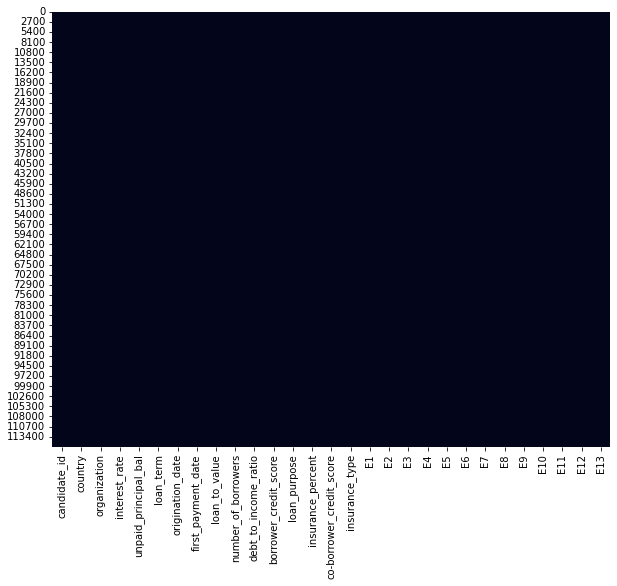

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False)

No missing values in this dataset

In [7]:
df.columns

Index(['candidate_id', 'country', 'organization', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
       'E13'],
      dtype='object')

In [8]:
df['origination_date'].unique()

array(['01-03-2012', '01-01-2012', '01-02-2012'], dtype=object)

In [9]:
df['first_payment_date'].unique()

array(['May-12', 'Mar-12', 'Apr-12', 'Feb-12'], dtype=object)

### Data analysis visualization

<AxesSubplot:title={'center':'Loan Origination date'}, xlabel='origination_date', ylabel='count'>

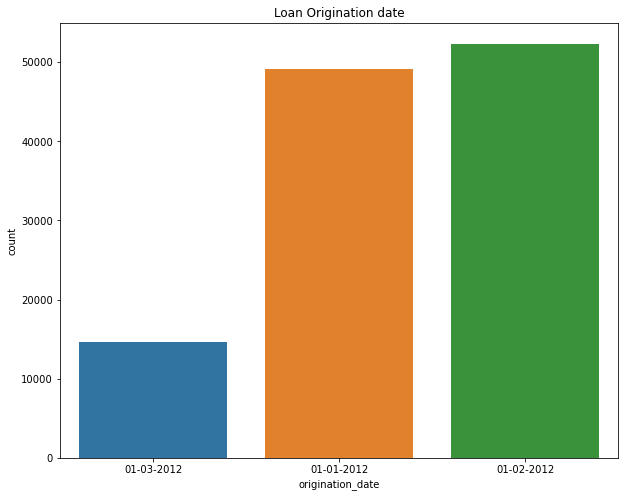

In [10]:
plt.figure(figsize=(10,8))
plt.title('Loan Origination date')
sns.countplot(x='origination_date',data=df)

1-02-2012 has more candidate 

<AxesSubplot:title={'center':'First Payment Date'}, xlabel='first_payment_date', ylabel='count'>

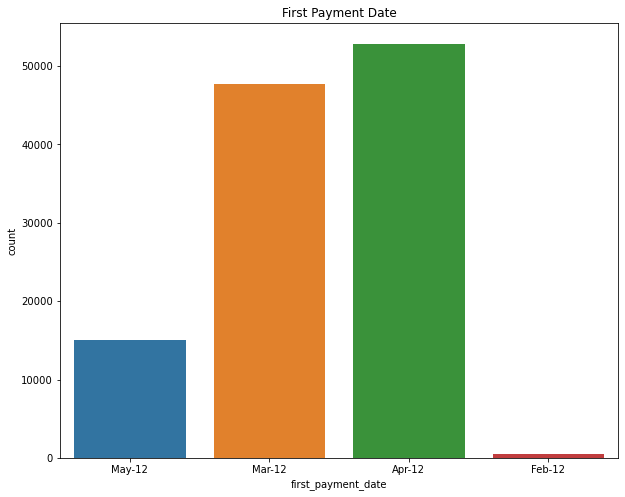

In [11]:
plt.figure(figsize=(10,8))
plt.title('First Payment Date')
sns.countplot(x='first_payment_date',data=df)

 April-12 has more first_paymnet 

<AxesSubplot:title={'center':'Loan purpose'}, xlabel='loan_purpose', ylabel='count'>

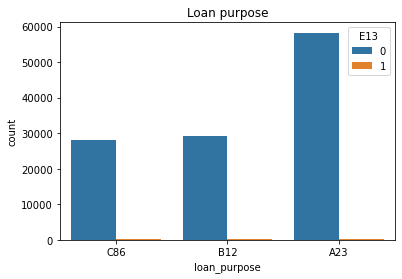

In [12]:

plt.title('Loan purpose')
sns.countplot(x='loan_purpose',hue='E13',data=df)

A23 loan purpose has more Non deliquent candidate

Text(0.5, 0, 'credit score')

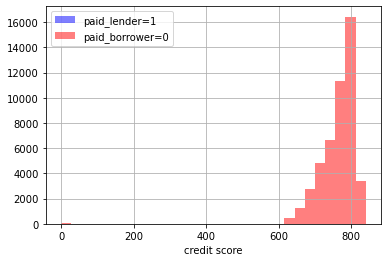

In [13]:
# plt.figure(figsize=(10,8))

df[df['co-borrower_credit_score']==1]['borrower_credit_score'].hist(alpha=0.5,color='blue',
                                              bins=30,label='paid_lender=1')

df[df['co-borrower_credit_score']==0]['borrower_credit_score'].hist(alpha=0.5,color='red',
                                              bins=30,label='paid_borrower=0')
plt.legend()

plt.xlabel('credit score')


Text(0.5, 0, 'credit score')

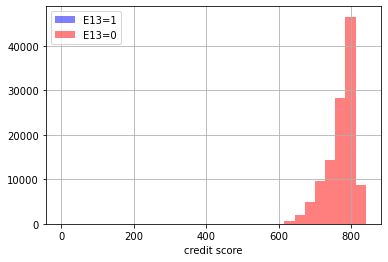

In [14]:
# plt.figure(figsize=(10,8))

df[df['E13']==1]['borrower_credit_score'].hist(alpha=0.5,color='blue',
                                              bins=30,label='E13=1')

df[df['E13']==0]['borrower_credit_score'].hist(alpha=0.5,color='red',
                                              bins=30,label='E13=0')
plt.legend()

plt.xlabel('credit score')


<Figure size 1440x576 with 0 Axes>

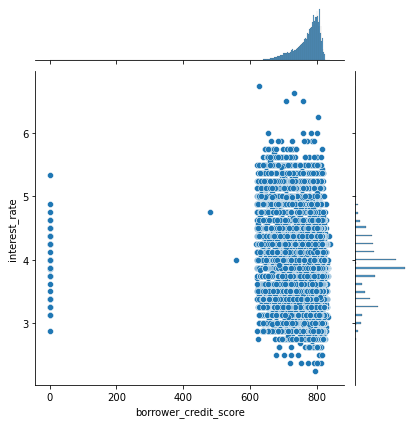

In [15]:
plt.figure(figsize=(20,8))
sns.jointplot(x='borrower_credit_score',y='interest_rate',data=df)

<AxesSubplot:>

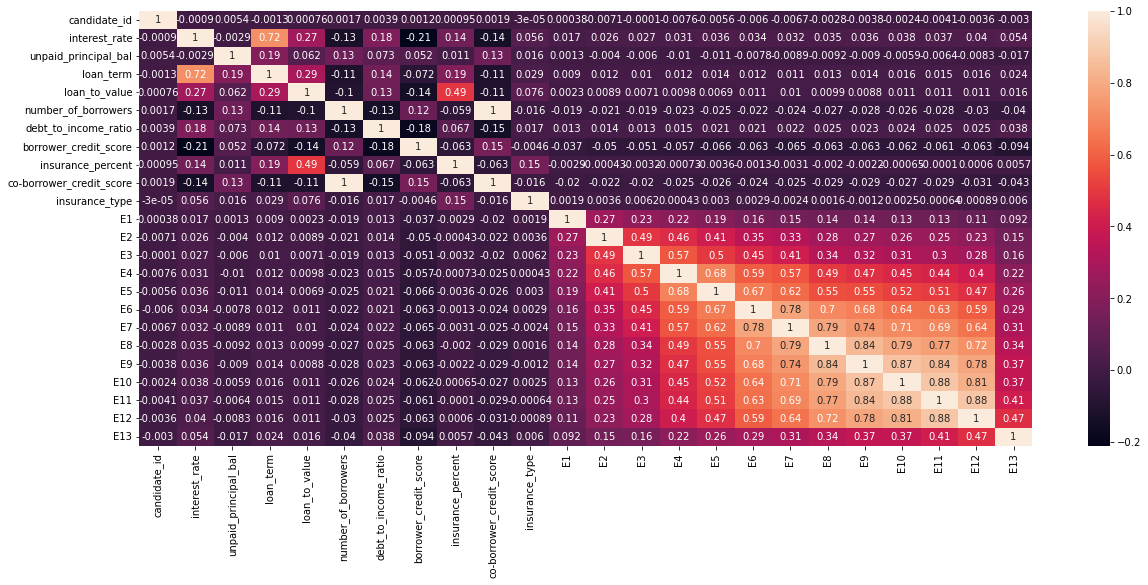

In [16]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
candidate_id,116058.0,5.494154e+11,2.597569e+11,1.000000e+11,3.240000e+11,5.490000e+11,7.740000e+11,1.000000e+12
interest_rate,116058.0,3.868961e+00,4.610200e-01,2.250000e+00,3.500000e+00,3.875000e+00,4.125000e+00,6.750000e+00
unpaid_principal_bal,116058.0,2.082262e+05,1.146851e+05,1.100000e+04,1.200000e+05,1.830000e+05,2.780000e+05,1.200000e+06
loan_term,116058.0,2.922810e+02,8.976241e+01,6.000000e+01,1.800000e+02,3.600000e+02,3.600000e+02,3.600000e+02
loan_to_value,116058.0,6.743194e+01,1.729172e+01,6.000000e+00,5.700000e+01,7.200000e+01,8.000000e+01,9.700000e+01
number_of_borrowers,116058.0,1.593186e+00,4.912417e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
debt_to_income_ratio,116058.0,3.074229e+01,9.730798e+00,1.000000e+00,2.300000e+01,3.100000e+01,3.900000e+01,6.400000e+01
borrower_credit_score,116058.0,7.699268e+02,4.221071e+01,0.000000e+00,7.510000e+02,7.820000e+02,8.000000e+02,8.400000e+02
insurance_percent,116058.0,2.786288e+00,8.096464e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
co-borrower_credit_score,116058.0,4.596116e+02,3.819469e+02,0.000000e+00,0.000000e+00,7.400000e+02,7.910000e+02,8.360000e+02


In [18]:
##Feature selection

data=df[['interest_rate',
        'unpaid_principal_bal','loan_term',
        'loan_to_value','number_of_borrowers',
        'borrower_credit_score',
        'insurance_percent','co-borrower_credit_score','insurance_type','E1',
         'E2','E3','E4','E5','E6','E7','E8','E9','E10','E11','E12',
         'E13']]
data.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,E1,...,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,4.250,214000,360,95,1,694,30,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,4.875,144000,360,72,1,697,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3.250,366000,180,49,1,780,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.750,135000,360,46,2,633,0,638,0,0,...,0,0,0,0,0,1,1,1,1,1
4,4.750,124000,360,80,1,681,0,0,0,0,...,3,4,5,6,7,8,9,10,11,1


In [19]:
#check categorial data

df_cat=data.select_dtypes(include=['object'])
df_cat.head()

""
0
1
2
3
4


In [20]:
#label encoding

# from sklearn.preprocessing import LabelEncoder
# import warnings
# warnings.filterwarnings('ignore')

# le=LabelEncoder()
# data['loan_purpose']=le.fit_transform(data['loan_purpose'])
# data.head()

<AxesSubplot:xlabel='E13', ylabel='count'>

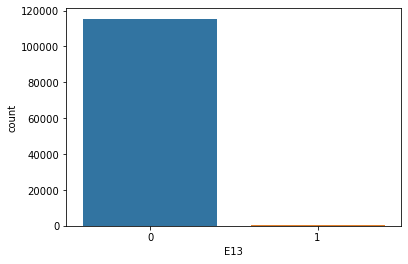

In [21]:
## check imbalncing dataset

sns.countplot(x='E13',data=data)

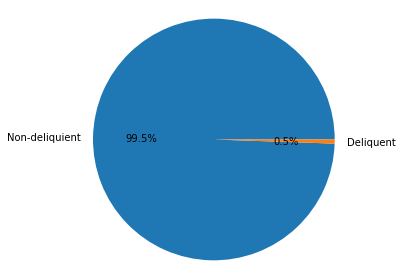

In [37]:
labels=['Non-deliquient','Deliquent']
sizes=[data['E13'].value_counts()[0],data['E13'].value_counts()[1]]
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%')
ax1.axis('equal')
plt.tight_layout()
plt.show()

The class is imbalance when the minority class has only 5-10% data.we have 0.5% minority class..so there is imbalancing

In [43]:
Non_deliquent=data[data['E13']==0]
Deliquent=data[data['E13']==1]


In [24]:
x=data.drop('E13',axis=1)
y=data['E13']
x.head()
x.shape,y.shape

((116058, 21), (116058,))

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x)
scaled_data=scaler.transform(x)

scaled_data.shape,scaled_data

((116058, 21),
 array([[ 0.82651708,  0.05034483,  0.75442817, ..., -0.04458259,
         -0.04364174, -0.04527618],
        [ 2.18221241, -0.5600248 ,  0.75442817, ..., -0.04458259,
          6.09571886, -0.04527618],
        [-1.34259545,  1.37571888, -1.25087412, ..., -0.04458259,
         -0.04364174, -0.04527618],
        ...,
        [ 0.01309988, -0.36819435,  0.75442817, ..., -0.04458259,
         -0.04364174, -0.04527618],
        [ 0.82651708, -0.34203565,  0.75442817, ..., -0.04458259,
         -0.04364174, -0.04527618],
        [-1.07145638,  0.38168834, -1.25087412, ..., -0.04458259,
         -0.04364174, -0.04527618]]))

In [26]:
## Balancing data using SMOTE

from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42,sampling_strategy=1)

x_sm,y_sm=smote.fit_resample(scaled_data,y)

y_sm.value_counts()

1    115422
0    115422
Name: E13, dtype: int64

In [27]:
# pip install xgboost

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from collections import Counter

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

print(f'Training target: {Counter(y_sm)}')
print(f'Testing target: {Counter(ytest)}')

Training target: Counter({1: 115422, 0: 115422})
Testing target: Counter({1: 23142, 0: 23027})


In [53]:
def model_report(ytest,ypred):
    
    print()
    print('Accuracy score:',accuracy_score(ytest,ypred))
    print('precision score:',precision_score(ytest,ypred))
    print('Recall score:',recall_score(ytest,ypred))
    print('F1Score score:',f1_score(ytest,ypred))
    print()
    print('classification report:\n',classification_report(ytest,ypred))
    print('confusion matrix:\n',confusion_matrix(ytest,ypred))
    pass

In [54]:
## LOGISTIC REGRESSION

log=LogisticRegression()
log.fit(xtrain,ytrain)
log_pred=log.predict(xtest)

In [55]:
df_log=pd.DataFrame({'ytest':ytest,'predicted':log_pred})

log_score=model_report(ytest,log_pred)


Accuracy score: 0.8244926249214841
precision score: 0.9006767197740715
Recall score: 0.7304035951948837
F1Score score: 0.8066525090076118

classification report:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84     23027
           1       0.90      0.73      0.81     23142

    accuracy                           0.82     46169
   macro avg       0.84      0.82      0.82     46169
weighted avg       0.84      0.82      0.82     46169

confusion matrix:
 [[21163  1864]
 [ 6239 16903]]


In [56]:
## RANDOMFOREST CLASSIFIER

rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf_pred=rf.predict(xtest)

In [57]:
rf_score=model_report(ytest,rf_pred)


Accuracy score: 0.9956464294223397
precision score: 0.9944820450920377
Recall score: 0.9968455621813154
F1Score score: 0.9956624010013164

classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     23027
           1       0.99      1.00      1.00     23142

    accuracy                           1.00     46169
   macro avg       1.00      1.00      1.00     46169
weighted avg       1.00      1.00      1.00     46169

confusion matrix:
 [[22899   128]
 [   73 23069]]


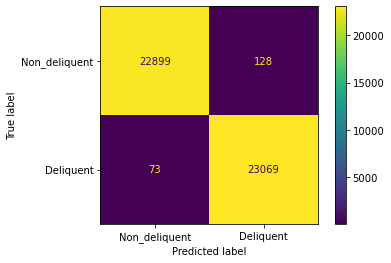

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,xtest,ytest,values_format='d',display_labels=['Non_deliquent','Deliquent'])

In [59]:
model_score=pd.DataFrame({'Models':['Logistic','RandomForest'],
                         'F1_score':[f1_score(ytest,log_pred),
                                           f1_score(ytest,rf_pred)],
                         'Accuracy_score':[accuracy_score(ytest,log_pred),
                                          accuracy_score(ytest,rf_pred)]})
                            
model_score.sort_values(by='F1_score',ascending=False)

,Models,F1_score,Accuracy_score
1,RandomForest,0.995662,0.995646
0,Logistic,0.806653,0.824493
